Populating the interactive namespace from numpy and matplotlib


/Users/Parsa/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['angle']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0,0.5,'firing rate (Hz)')

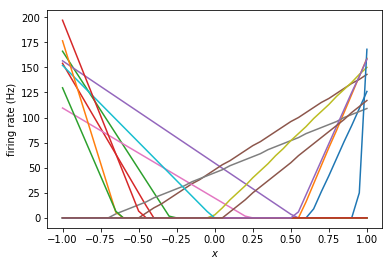

In [35]:
#Question 1.1a
%pylab inline
from BaseNeuron import BaseNeuron
from RectifiedLinear import RectifiedLinear
import numpy as np

#num neurons
N = 16

#Array of encoders
es = np.random.choice([-1, 1], size=N)

xInts = np.random.uniform(-0.95, 0.95, N)
max_rates = np.random.uniform(100, 200, N)

slope = max_rates / (es - xInts);
biases = -1*slope*xInts;
gains = abs(slope)

x = np.arange(-1,1.05,0.05)
A = np.zeros(shape=(size(x),N))

for i in range(0, N):
    neuron = RectifiedLinear(gains[i], biases[i], es[i]);
    a = neuron.tuningSimple(x)
    A[:, i] = a

pyplot.plot(x, A)
xlabel('$x$')
ylabel('firing rate (Hz)')

In [36]:
#Question 1.1b
D = BaseNeuron.decodeIdeal(A, x)
print ("The decoders are: ")
print(D)

The decoders are: 
[  6.98101190e-05  -1.46725655e-04  -1.20615880e-04   3.13387991e-04
  -2.81077358e-03   2.49884217e-03  -1.87173389e-04   7.21971449e-04
   2.40983438e-03  -2.62970222e-03   6.14178847e-06  -4.89870651e-04
   5.34247692e-04  -7.63924874e-04   9.60235767e-04   5.50038660e-04]


RMSE 0.000981804


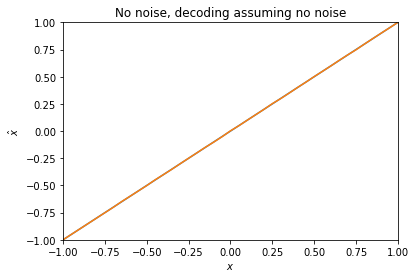

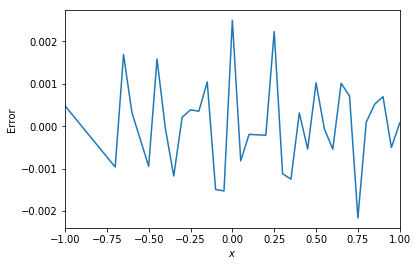

In [37]:
#Question 1.1c
xhat = np.dot(A, D)
error = xhat - x

figure()
title('No noise, decoding assuming no noise')
plot(x, x)
plot(x, xhat)
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE = np.sqrt(np.average(error**2))
print('RMSE %g' % RMSE)

RMSE 0.124203


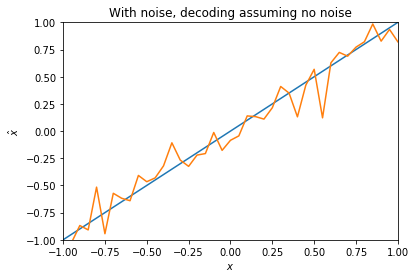

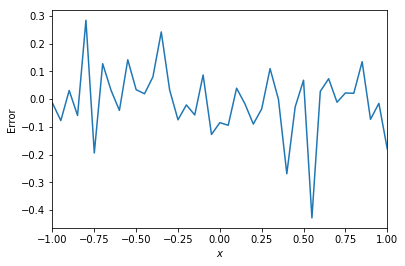

In [38]:
#Question 1.1d, now with noise!

An = A + np.random.normal(scale=0.2*np.max(A), size=shape(A))

D2 = BaseNeuron.decodeIdeal(An, x)


xhat2 = np.dot(An, D2)
error2 = xhat2 - x

figure()
plot(x, x)
plot(x, xhat2)
title('With noise, decoding assuming no noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error2)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE2 = np.sqrt(np.average(error2**2))
print('RMSE %g' % RMSE2)

With noise, decoding accounting for noise
RMSE 0.124203
Without noise, decoding accounting for noise
RMSE 0.000981804


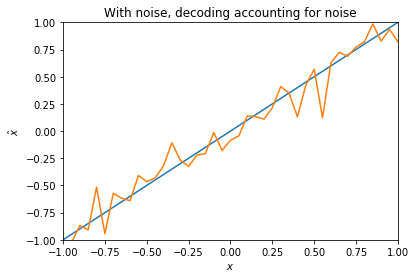

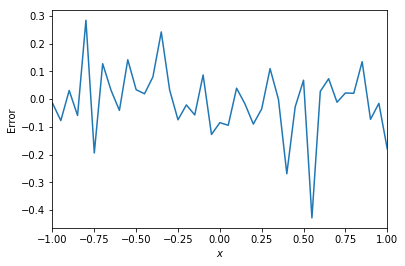

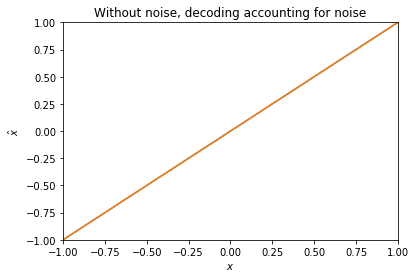

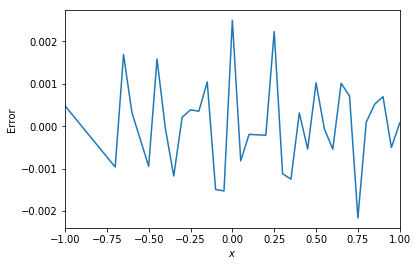

In [39]:
#Question 1.1e
sigma = 0.2
S = size(x)

D3 = BaseNeuron.decode(An, x, sigma, S)
D4 = BaseNeuron.decode(A, x, 0, 1)

xhat3 = np.dot(An, D3)
xhat4 = np.dot(A, D4)
error3 = xhat3 - x
error4 = xhat4 - x

figure()
plot(x, x)
plot(x, xhat3)
title('With noise, decoding accounting for noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error3)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

print("With noise, decoding accounting for noise")
RMSE3 = np.sqrt(np.average(error3**2))
print('RMSE %g' % RMSE3)

figure()
plot(x, x)
plot(x, xhat4)
title('Without noise, decoding accounting for noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error4)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

print('Without noise, decoding accounting for noise')
RMSE4 = np.sqrt(np.average(error4**2))
print('RMSE %g' % RMSE4)

##### QUESTION1.1F

|        | Decoding Ideal | Decoding account for noise |
|--------|----------------|----------------------------|
|A       | 0.00121869     | 0.145371                   |
|A_noisy | 0.145371       | 0.00246243                 |

We can see that the best case is when there is no noise and you decode assuming no noise. But in the presence of noise, you are significantly better of decoding accounting for noise. Interestingly, when there is no noise and you account for it, and when there is noise but you decode ideally, you get the same results. 

Note: The values may not align exactly as above if you rerun the notebook since the values are hardcoded in markdown.

In [42]:
#Question 1.2a
def Question12a(sigma):
    def eDistortion(x, xhat):
        S = size(x)
        return 0.5*np.sum(((x-np.sum(xhat))**2))/S

    def eNoise(sigma, D):
        return (sigma*sigma)*(np.sum(np.square(D)))

    Ns = [4, 8, 16, 32, 64, 128, 256, 512]
    eDs = np.zeros(shape(Ns))
    eNs = np.zeros(shape(Ns))
    for i in range(0, size(Ns)): #number neurons
        eD_total = 0;
        eN_total = 0;
        for j in range(0,5): #averaging over 5
            A = np.zeros(shape=(size(x),Ns[i]))
            for k in range(0, Ns[i]):
                ek = np.random.choice([-1, 1])
                gain = np.random.choice(gains)
                bias = np.random.choice(biases)
                neuron = RectifiedLinear(gain, bias, ek);
                a = neuron.tuningSimple(x)
                A[:, k] = a
            Decs = BaseNeuron.decode(A, x, sigma, size(x)) #My namings going a bit wonky cuz I cant remember what Ive already used
            xhatz = np.dot(A, Decs)
            eD_total += eDistortion(x, xhatz)
            eN_total += eNoise(sigma, Decs)

        eD_average = eD_total/5
        eN_average = eN_total/5
        eDs[i] = eD_average
        eNs[i] = eN_average
        
    print(eNs)

        
Question12a(sigma=0.1)

#Question 1.2b
Question12a(sigma=0.01)

print("The Difference Tells us that...")


[  2.08137154e-05   6.79756262e-06   7.33665255e-06   1.69471892e-07
   1.55953801e-08   4.20559765e-09   9.38179875e-10   2.82618366e-10]
[  7.18148940e-09   3.51056561e-08   2.34991742e-08   6.75097916e-10
   1.32724266e-09   3.40800427e-11   1.22292417e-08   1.81453975e-11]
The Difference Tells us that...


Text(0,0.5,'firing rate (Hz)')

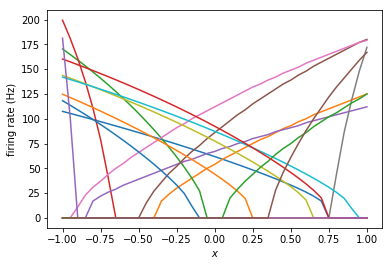

In [7]:
#Question 1.3a
from LIF import LIF

#num neurons
N = 16

es = np.random.choice([-1, 1], size=N) #Array of encoders
xInts = np.random.uniform(-0.95, 0.95, N)
max_rates = np.random.uniform(100, 200, N)

x = np.arange(-1,1.05,0.05)
A = np.zeros(shape=(size(x),N))

for i in range(0, N):
    neuron = LIF(0, 0, es[i]);
    neuron.setParams(es[i], max_rates[i], xInts[i])
    a = neuron.tuningSimple(x)
    A[:, i] = a

figure()
pyplot.plot(x, A)
xlabel('$x$')
ylabel('firing rate (Hz)')

RMSE 0.0578646
RMSE 0.00660532


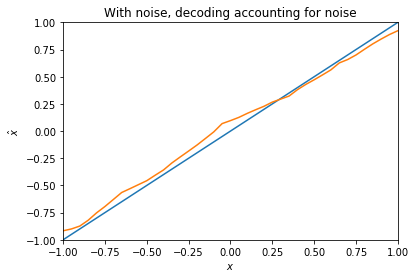

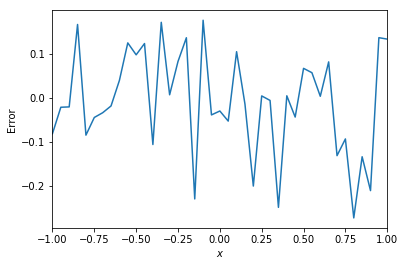

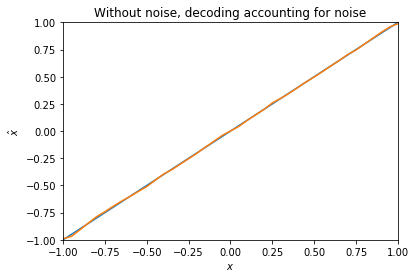

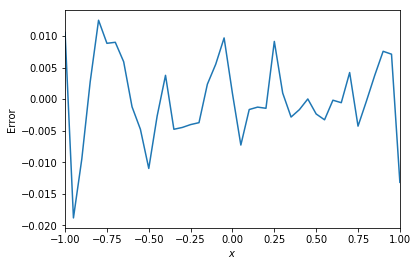

In [8]:
#Questions 1.3b
sigma = 0.2
S = size(x)

An = A + np.random.normal(scale=sigma*np.max(A), size=shape(A))

D = BaseNeuron.decode(An, x, sigma, S)
D2 = BaseNeuron.decode(A, x, 0, S)

xhat = np.dot(A, D)
xhat2 = np.dot(A, D2)
error = xhat - x
error2 = xhat2 - x

figure()
plot(x, x)
plot(x, xhat)
title('With noise, decoding accounting for noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error3)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE = np.sqrt(np.average(error**2))
print('RMSE %g' % RMSE)

figure()
plot(x, x)
plot(x, xhat2)
title('Without noise, decoding accounting for noise')
xlabel('$x$')
ylabel('$\hat{x}$')
ylim(-1, 1)
xlim(-1, 1)

figure()
plot(x, error2)
xlabel('$x$')
ylabel('Error')
xlim(-1, 1)

RMSE2 = np.sqrt(np.average(error2**2))
print('RMSE %g' % RMSE2)

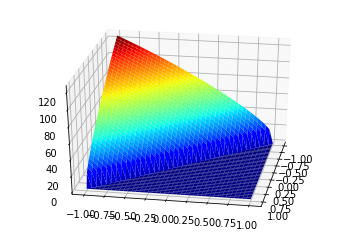

In [9]:
#Question 2.1a
e_pref = (-1./np.sqrt(2), -1./np.sqrt(2))
neuron = LIF(0, 0, e_pref);
neuron.setParams(e_pref, 100, (0,0))

X,Y = np.mgrid[-1:1.05:0.05, -1:1.05:0.05]
xy = np.vstack((X.flatten(), Y.flatten())).T

A = neuron.tuningSimple(xy)
A2 = reshape(A,X.shape)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
p = ax.plot_surface(X, Y, A2, linewidth=1, cstride=1, rstride=1, cmap=pylab.cm.jet)
ax.view_init(30, 10)
plt.draw()

A cosine is a good function to approximate the tuning curve because the encoder lies on the negative y axis
and as you sweep across the unit circle you get a sinusoidal bump as your x starts to get a larger negative y
component. Of course this won't be exact as the function has a minimum current cutoff (hence why we don't see
a negative component in the tuning curve), and the fitted curve attempts to account for the zeros on the 
tuning curve.


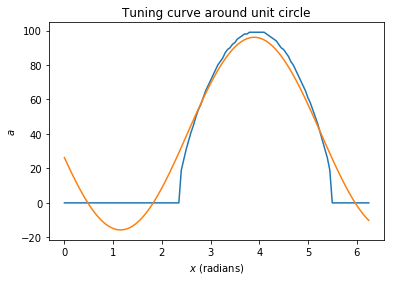

In [10]:
#Question 2.1b
from scipy.optimize import curve_fit
angles_ = np.arange(0, 2*np.pi, 0.05)
x2, y2 = np.cos(angles_), np.sin(angles_)
xy2 = np.vstack((x2.flatten(), y2.flatten())).T
A = neuron.tuningSimple(xy2)
figure()
plot(angles_, A)
title('Tuning curve around unit circle')
xlabel('$x$ (radians)')
ylabel('$a$')

def my_cos(x, A, B, C, D):
    return A*np.sin(x * B + C) + D
init_guess = [100, 1, 4, 40]
paramz = curve_fit(my_cos, angles_, A, p0=init_guess)
data_fit = my_cos(angles_, *paramz[0])
plot(angles_, data_fit)

print("A cosine is a good function to approximate the tuning curve because the encoder lies on the negative y axis") 
print("and as you sweep across the unit circle you get a sinusoidal bump as your x starts to get a larger negative y")
print("component. Of course this won't be exact as the function has a minimum current cutoff (hence why we don't see")
print("a negative component in the tuning curve), and the fitted curve attempts to account for the zeros on the ")
print("tuning curve.")

Text(0,0.5,'y')

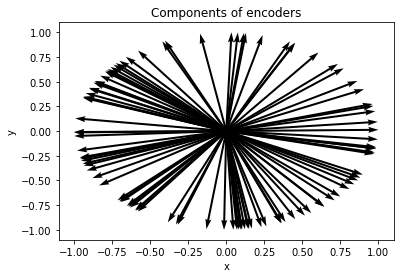

In [11]:
#Question 2.2a
n = 100
angles = np.random.uniform(0, 2*np.pi,n)
def unitVector(x):
    return (np.cos(x), np.sin(x))

origin = np.zeros(n)
U, V = unitVector(angles)
figure()
quiver(np.zeros(n), np.zeros(n), U, V, angles='xy', scale_units='xy', scale=1)
xlim(-1.1,1.1)
ylim(-1.1,1.1)
title("Components of encoders")
xlabel('x')
ylabel('y')

In [12]:
#Question 2.2b
N = 100
A = np.zeros(shape=(size(X),N))
for i in range(0, N):
    ei = (U[i], V[i])
    neuron = LIF(0, 0, ei);
    neuron.setParams(ei, 100, (0,0))
    a = neuron.tuningSimple(xy)
    A[:, i] = a
    
An = A + np.random.normal(scale=sigma*np.max(A), size=shape(A))
D = BaseNeuron.decode(An,xy,sigma,size(xy))
print("The decoders are: ")
print(D)

The decoders are: 
[[  5.35484954e-04   5.09071748e-05]
 [ -1.07443610e-05  -2.95988218e-04]
 [ -7.86979242e-05   7.36772232e-04]
 [ -5.10853900e-05   2.44587663e-04]
 [ -5.94491797e-05  -1.78991790e-04]
 [  8.21916265e-05   4.37758864e-04]
 [ -9.83433114e-05   2.27161678e-04]
 [ -3.30848729e-04  -2.01867486e-04]
 [ -2.98056012e-04  -8.51115734e-05]
 [ -1.31150060e-04  -3.33886113e-04]
 [  3.63103908e-04   1.21884876e-04]
 [ -4.22505078e-04  -2.89919039e-04]
 [ -2.75146491e-04   5.44888156e-04]
 [ -3.84232062e-04   2.74266316e-04]
 [  1.30877786e-04   5.31914431e-04]
 [ -3.33287156e-04   1.18601765e-04]
 [  4.31903604e-04  -3.26075965e-05]
 [  4.43240869e-05  -3.38857700e-04]
 [  3.89580894e-05  -3.33812489e-04]
 [ -5.39403372e-04   1.13267768e-05]
 [  3.33912162e-04   5.35082772e-04]
 [ -3.55169960e-04   1.58141658e-04]
 [ -2.36103408e-04  -5.66989838e-05]
 [ -2.09368300e-04   1.57766201e-05]
 [ -3.88372977e-06   5.75966610e-04]
 [ -2.76979864e-04   3.40726552e-04]
 [  1.20310549e-04 

RMSE 6.50001e-06


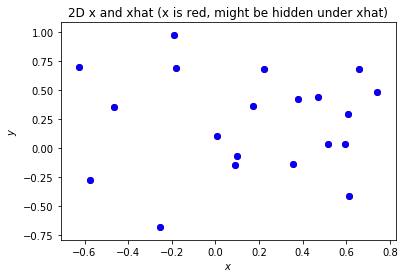

In [13]:
#Question 2.2c
n = 20
length = np.random.uniform(0, 1, n)
angle = np.pi * np.random.uniform(0, 2, n)

x = length * np.cos(angle)
y = length * np.sin(angle)

A = np.zeros(shape=(size(x),N))
xy = np.vstack((x.flatten(), y.flatten())).T

for i in range(0, n):
    ei = (U[i], V[i])
    neuron = LIF(0, 0, ei);
    neuron.setParams(ei, 100, (0,0))
    a = neuron.tuningSimple(xy)
    A[:, i] = a

An = A + np.random.normal(scale=sigma*np.max(A), size=shape(A))
D = BaseNeuron.decode(An,xy,sigma,size(xy))
xhat = np.dot(An, D)
error = xy - xhat

figure()
# plot(x, xy)
scatter(xy[:,0], xy[:,1], color="red")
scatter(xhat[:,0], xhat[:,1], color="blue")
title('2D x and xhat (x is red, might be hidden under xhat)')
xlabel('$x$')
ylabel('$y$')

RMSE = np.sqrt(np.average(error**2))
print('RMSE %g' % RMSE)

RMSE 265.035
Swapping the encoders and decoders does not seem to be a great idea


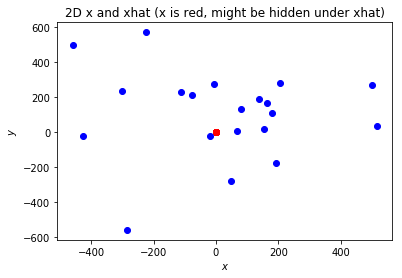

In [14]:
#Question 2.2d
E = np.zeros(shape(D))
E[:,0] = U
E[:,1] = V
xhat2 = np.dot(An, E)
error2 = xy - xhat2

figure()
scatter(xy[:,0], xy[:,1], color="red")
scatter(xhat2[:,0], xhat2[:,1], color="blue")
title('2D x and xhat (x is red, might be hidden under xhat)')
xlabel('$x$')
ylabel('$y$')

RMSE2 = np.sqrt(np.average(error2**2))
print('RMSE %g' % RMSE2)

print ("Swapping the encoders and decoders does not seem to be a great idea")